18004194000

1. Understand the problem, what is required in the problem ?
    * What is the unknown ?
    * What is the data ?
    * What is the condition ?
2. How unknown is linked to the data ?
3. Make a plan
4. Carry out our plan
5. Evaluate results of the plan


Preparatory Stage:

* Introduce suitable notation.
* Is it possible to satisfy the condition ?

Problem Statement:

There are 9 different types of gifts, and total of 1000 bags. Each bag can hold only 50 pounds. Each gift has a fixed weight but individual weights are unknown. The weights for each of the gifts can be different. We only have information about the probability distributions for each type of gift.


Constraints:

1. A bag can not hold more than 50 pounds.
2. No gift can be used more than once.
3. Every bag must have 3 or more gifts.

Problem asks us to find out a combination of gifts in bags such that we are able to carry maximum amount of weight possible.

e.g.

Bag 1: horse_0 book_345 gloves_48
Bag 2: doll_873 train_714 coal23 bike_85

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%run ../src/santa_helper.py

In [2]:
gifts = pd.read_csv('../data/gifts.csv')

In [3]:
print('Number of gift items: %d'%(len(gifts)))

Number of gift items: 7166


** Number of bags available are 1000 and each bag should contain atleast 3 items, even if we do that then we could pick maximum of 3000 gift items. Number of gift items available to us is way more than that. **

In [4]:
# distribution of count of different gift items available to the elves
gifts_count = gifts.GiftId.str.split('_').map(lambda x: x[0]).value_counts().to_dict()
gifts_count

{'ball': 1100,
 'bike': 500,
 'blocks': 1000,
 'book': 1200,
 'coal': 166,
 'doll': 1000,
 'gloves': 200,
 'horse': 1000,
 'train': 1000}

__Weight distribution for each of the gift item__

In [5]:
horse  = horse_weight_distribution(sample_size=1e3)
ball   = ball_weight_distribution(sample_size=1e3)
bike   = bike_weight_distribution(sample_size=1e3)
train  = train_weight_distribution(sample_size=1e3)
coal   = coal_weight_distribution(sample_size=1e3)
book   = book_weight_distribution(sample_size=1e3)
doll   = doll_weight_distribution(sample_size=1e3)
block  = block_weight_distribution(sample_size=1e3)
gloves = gloves_weight_distribution(sample_size=1000)

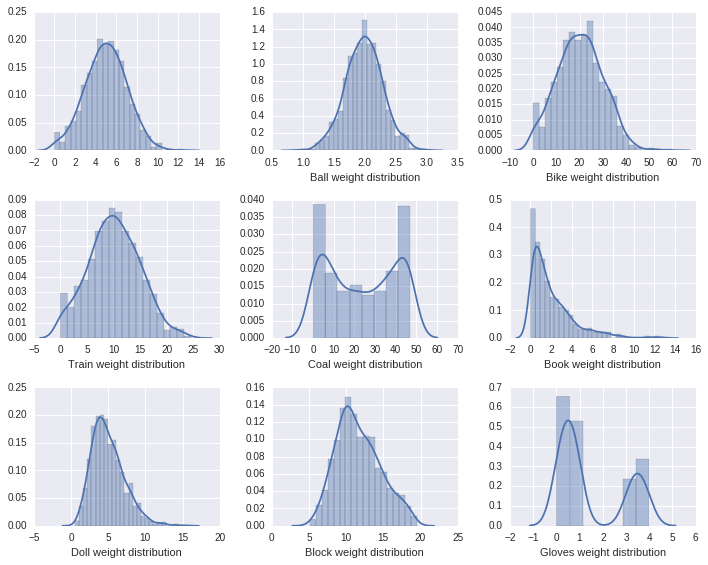

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

sns.distplot(horse, ax=ax[0][0])
ax[0][1].set_xlabel('Horse weight distribution')

sns.distplot(ball, ax=ax[0][1])
ax[0][1].set_xlabel('Ball weight distribution')

sns.distplot(bike, ax=ax[0][2])
ax[0][2].set_xlabel('Bike weight distribution')

sns.distplot(train, ax=ax[1][0])
ax[1][0].set_xlabel('Train weight distribution')

sns.distplot(coal, ax=ax[1][1])
ax[1][1].set_xlabel('Coal weight distribution')

sns.distplot(book, ax=ax[1][2])
ax[1][2].set_xlabel('Book weight distribution')

sns.distplot(doll, ax=ax[2][0])
ax[2][0].set_xlabel('Doll weight distribution')

sns.distplot(block, ax=ax[2][1])
ax[2][1].set_xlabel('Block weight distribution')

sns.distplot(gloves, ax=ax[2][2])
ax[2][2].set_xlabel('Gloves weight distribution')

plt.tight_layout();

> What is the unknown ?
 - Configuration of differnt types of gifts in different bags respecting the constraint that carries maximum possible weight.

> What are the data ?
 - Weight distribution of each type of gift.
 - Count of each type of gift.

** Is the condition sufficient to find the unknown ? **

` No bag should weigh more than 50 pounds. `

- If we look closely at the weight distribution no gift can have weight greater than or equal to 50, so there is always a possibility to shove more gifts in a bag.

` Every bag must contain atleast gifts. `

- By virtue of condition 1, this would get satisfied.

` After going through the problem statement, it looks like this problem would fall under the category of 0-1 Multiple Knapsack Problem where weights are not fixed but are random variables. `

** Biggest challenge for us is that we don't have any information about weights for any of the gifts. **

```
Consider a much simpler problem in which a single bag has to be filled with items having fixed weight and the only constraint is that total weight should be less than maximum possible weight that a bag can hold.
```

` We will take a greedy approach in solving this problem `
* Sort the dictionary based on the weights
* Iterate over all the gifts and choose gifts in such a way that total weight does not exceed 50.

In [53]:
def sort_gifts(gifts):
    return sorted(gifts, key=lambda x: gifts[x], reverse=True)

In [54]:
def greedy_bin_packing(gifts, keys, C):
    bag = []
    weight_in_bag = 0
    
    for key in keys:
        if weight_in_bag + gifts[key] <= C:
            weight_in_bag += gifts[key]
            bag.append(key)
    
    return bag

In [55]:
def find_solution(gifts, C):
    sorted_keys = sort_gifts(gifts)
    bag         = greedy_bin_packing(gifts, sorted_keys, C)
    return ' '.join(bag)

In [56]:
items = {'horse_1': 7, 'horse_2': 7, 'horse_3': 3, 'horse_4': 5,
         'horse_5': 2, 'coal_1': 45, 'coal_2': 23}

C = 50 # weight constraint

find_solution(items, C)

'coal_1 horse_4'

In [57]:
items = {'horse_1': 3, 'horse_2': 5, 'horse_3': 7, 'horse_4': 4,
         'horse_5': 6, 'coal_1': 40, 'coal_2': 23}

C = 50 # weight constraint

find_solution(items, C)

'coal_1 horse_3 horse_1'

```
Let's also try to include another constraint which is that there must be atleast 3 items in the bag.
```

In [58]:
def greedy_bin_packing_with_constraints(gifts, keys, C, min_items):
    bag = []
    remaining_weight = C
    items_in_bag = 0
    min_weight   = min(gifts.values())
    
    for key in keys:
        if items_in_bag < min_items - 1:
            if remaining_weight - gifts[key] >= min_weight:
                remaining_weight -= gifts[key]
                bag.append(key)
                items_in_bag += 1
        else:
            if remaining_weight - gifts[key] >= 0:
                remaining_weight -= gifts[key]
                bag.append(key)
                items_in_bag += 1
                
    if items_in_bag < min_items:
        return 'No solution found'
    else:
        return ' '.join(bag)

In [60]:
def find_solution_with_constraints(gifts, C, min_items):
    sorted_keys = sort_gifts(gifts)
    bag         = greedy_bin_packing_with_constraints(gifts, sorted_keys, C, min_items)
    return bag

In [61]:
items = {'horse_1': 3, 'horse_2': 2, 'horse_3': 1, 'horse_4': 1,
         'horse_5': 1, 'coal_1': 48, 'coal_2': 23}

C = 50 # weight constraint

find_solution_with_constraints(items, C, 3)

'coal_1 horse_4 horse_3'

` Greedy Search works it assume that local maxima will lead us to global maxima `

```
Let us extend our analysis and see whether we are able to extend our solution to multiple knapsack problem.

To extend our solution, we need to keep track of items that have already been placed in one of the bags.
```

In [67]:
def get_minimum_weight(items, is_available):
    min_weight = 100
    
    for key, weight in items.items():
        if is_available[key] and weight < min_weight:
            min_weight = weight
    
    return min_weight
    
def greedy_multi_bin_packing(items, n_bags, keys, C, min_items):
    # create a dict of keys of booleans
    is_available = {k:True for k in keys}
    bags = [] # keep track of solution for each bag
    
    for i in range(n_bags):
        bag = []
        remaining_weight = C
        items_in_bag     = 0
        min_weight       = get_minimum_weight(items, is_available)
        
        for key in keys:
            if items_in_bag < min_items - 1:
                if is_available[key] and remaining_weight - items[key] >= min_weight:
                    remaining_weight -= items[key]
                    bag.append(key)
                    is_available[key] = False # mark this product as being used.
                    items_in_bag += 1
            else:
                if is_available[key] and remaining_weight - items[key] >= 0:
                    remaining_weight -= items[key]
                    bag.append(key)
                    is_available[key] = False # mark this product as being used.
                    items_in_bag += 1
    
        if items_in_bag < min_items:
            bags.append('No solution found')
        else:
            bags.append(' '.join(bag))
        
    return bags

def find_solution_multi_knapsack(items, n_bags, C, min_items):
    sorted_keys = sort_gifts(items)
    bags        = greedy_multi_bin_packing(items, n_bags, sorted_keys, C, min_items)
    return bags

In [68]:
items = {'horse_1': 3, 'horse_2': 2, 'horse_3': 1, 
         'horse_4': 1, 'horse_5': 1, 'horse_6': 7, 
         'horse_7': 2, 'coal_1': 40, 'coal_2': 23, 
         'coal_3': 16, 'coal_4': 16
        }

C = 50 # weight constraint

find_solution_multi_knapsack(items, 2, C, 3) # C and min_items are constants

['coal_1 horse_6 horse_1',
 'coal_2 coal_4 horse_2 horse_7 horse_4 horse_3 horse_5']

In [95]:
def prepare_gift_dict(gift_ids, seed=2016, shuffle=False):
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(gift_ids)
    
    keys    = gift_ids
    weights = keys.map(lambda x: draw_distributions(x.split('_')[0], sample_size=1)[0]) 
    
    return dict(zip(keys, weights))

In [117]:
def get_total_weight(solution, items):
    total_weight = 0
    for sol in solution:
        if sol != 'No solution found':
            for key in sol.split(' '):
                total_weight += items[key]

    return total_weight

def get_solution(giftids, seed=2016, shuffle=False):
    items     = prepare_gift_dict(giftids, seed, shuffle)

    C         = 50 # weight constraint
    n_bags    = 1000
    min_items = 3

    solution  = find_solution_multi_knapsack(items, n_bags, C, min_items) # C and min_items are constants
    return solution

def evaluate(gift_ids, seed, shuffle, num_iterations = 1e2):
    scores = []
    for i in range(num_iterations):
        solution = get_solution(gift_ids, seed+1, shuffle)
        scores.append(get_total_weight(solution, items))
    
    return np.mean(scores), np.std(scores)

In [102]:
solution = get_solution(gifts.GiftId.copy(), 1231313, True)

In [ ]:
evaluate(gifts.GiftId.copy(), 213, True, 10000)

In [105]:
def write_submission(filename, solution):
    solution_file_path = '../data/%s.csv'%(filename)

    with open(solution_file_path, 'w') as outfile:
        outfile.write('Gifts\n')

        for sol in solution:
            if sol != 'No solution found':
                outfile.write(sol)
                outfile.write('\n')

        outfile.close()

In [106]:
write_submission('greedy_polya_shuffle_2', solution)